<img style="float: left; margin: 110px 30px 30px 30px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 

FLORES OROZCO, OSCAR ALFONSO.

PANIAGUA GARCÍA DE LEÓN, IVÁN

**Fecha:** 05 de marzo del 2020.

**Expedientes** :  710183 y 709025

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 9 y 10

### Ejercicio 1:

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
>   
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Demostrar que:

\begin{align*} 
P(k+1)&=\frac{\lambda}{k+1}P(k):\\
\end{align*}

\begin{align*}
\frac{P(k+1)}{P(k)} &= \frac{\frac{\lambda}{k+1} · \frac{e^{-\lambda}(\lambda)^k}{k!}}{\frac{e^{-\lambda}\lambda^k}{k!}} \\
\frac{P(k+1)}{P(k)} &= \frac{\frac{e^{-\lambda}\lambda^k · \lambda}{(k+1) ·k!}}{\frac{e^{-\lambda}\lambda^k}{k!}} \\
\frac{P(k+1)}{P(k)} &= \frac{e^{-\lambda} · \lambda^{{k+1}} · k!}{(k+1)! · e^{\lambda} · \lambda^k} \\
\frac{P(k+1)}{P(k)} &= \frac{\lambda^{k+1-k}· k!}{(k+1)· k!} \\
\frac{P(k+1)}{P(k)} &= \frac{\lambda}{(k+1)} \\
P(k+1) &= \frac{\lambda}{(k+1)}· P(k)
\end{align*}

### Una vez demostrada la ecuación, vamos a generar variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: center; text-align: center; justify-content: center; } </style> """))

In [2]:
def Poisson(k,l): #lambda y k, para coincidir con la demostracion
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def poi(i):
        global Pr
        x  = (l)/(i+1)
        Pr[i+1]=(x*Pr[i])    
    [poi(i) for i in range(k-1)]
    return np.cumsum(Pr)

In [10]:
l = 4
k = 20
n=10000

func_poisson = Poisson(k,l)

random = np.random.rand(n)

In [11]:
font = {'family': 'serif',
        'color':  'C7',
        'weight': 'normal',
        'size': 16,
        }

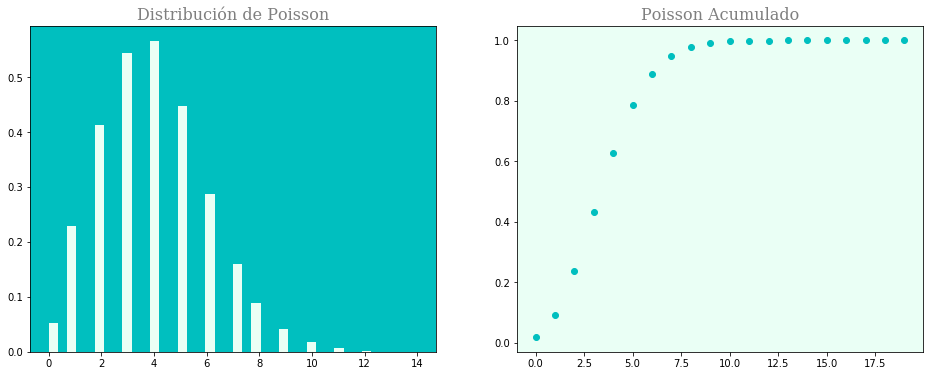

In [12]:
PoissonDistribucion = list(map(lambda j:sum(1 for i in func_poisson if i<random[j]),range(n)))

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (16,6))

#Plot1: Poisson
ax1.set_title("Distribución de Poisson", fontdict= font)
ax1.set_facecolor("c")
ax1.hist(PoissonDistribucion,bins=40,density=True, color = "#eafff5")

#Plot2: Poisson Accumulated
ax2.set_title("Poisson Acumulado", fontdict= font)
ax2.set_facecolor("#eafff5")
ax2.plot(func_poisson,"o", color = "c", label = "acum")
plt.show()

***
### Ejercicio 2:

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [2]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


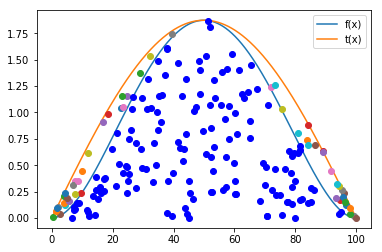

In [9]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) senoidal

# Función objetivo 
f = lambda x:30*((x/c)**2-2*(x/c)**3+(x/c)**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función senoidal
t = lambda x: a*np.sin(np.pi*(x/c)*np.ones(len(x))) # función senoidal

b=0
c=100
intervalos=0.01
x = np.arange(b,c,intervalos)  # Rango donde se graficará las funciones
print('El máximo de f es:',a)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(b,c,N)

Acep_rechazo(R2,R1,f,t)

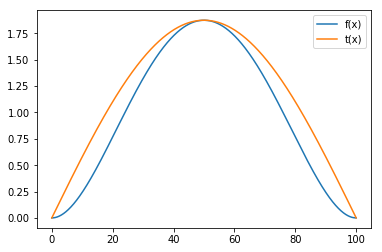

In [5]:
b=0
c=100
intervalos=0.01
N=200
R2 = np.random.rand(N)
R1 = np.random.uniform(b,c,N)
x = np.arange(b,c,intervalos)

# Función objetivo 
f = lambda x:30*((x/c)**2-2*(x/c)**3+(x/c)**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función senoidal
t = lambda x: a*np.sin(np.pi*(x/c)*np.ones(len(x))) # función senoidal

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue: